In [1]:
import modin.pandas as pd
import json
filePath = r"C:\\Users\\Pat\\Desktop\\Projects\\LoLAramPredictor\\Game Info\\"

In [2]:
with open(filePath+'champion.json', encoding='utf8') as f:
    championData = json.load(f)

champions = pd.DataFrame(columns = ['championId', 'name', 'attack', 'defense', 'magic', 'difficulty', 'primaryClass', 'secondaryClass', 'partype', 'hp', 'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen', 'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit', 'critperlevel', 'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel', 'attackspeed'])

for k, v in championData['data'].items():
    champions = champions.append({'championId': int(v['key']),
                        'name': v['name'], 
                        'attack': v['info']['attack'], 
                        'defense': v['info']['defense'], 
                        'magic': v['info']['magic'], 
                        'difficulty': v['info']['difficulty'], 
                        'primaryClass': v['tags'][0], 
                        'secondaryClass': v['tags'][1] if len(v['tags']) > 1 else 'None', 
                        'partype': v['partype'], 
                        'hp': v['stats']['hp'], 
                        'hpperlevel': v['stats']['hpperlevel'], 
                        'mp': v['stats']['mp'], 
                        'mpperlevel': v['stats']['mpperlevel'], 
                        'movespeed': v['stats']['movespeed'], 
                        'armor': v['stats']['armor'], 
                        'armorperlevel': v['stats']['armorperlevel'], 
                        'spellblock': v['stats']['spellblock'], 
                        'spellblockperlevel': v['stats']['spellblockperlevel'], 
                        'attackrange': v['stats']['attackrange'], 
                        'hpregen': v['stats']['hpregen'], 
                        'hpregenperlevel': v['stats']['hpregenperlevel'], 
                        'mpregen': v['stats']['mpregen'], 
                        'mpregenperlevel': v['stats']['mpregenperlevel'], 
                        'crit': v['stats']['crit'], 
                        'critperlevel': v['stats']['critperlevel'], 
                        'attackdamage': v['stats']['attackdamage'], 
                        'attackdamageperlevel': v['stats']['attackdamageperlevel'], 
                        'attackspeedperlevel': v['stats']['attackspeedperlevel'], 
                        'attackspeed': v['stats']['attackspeed']}, ignore_index=True)

champions

,championId,name,attack,defense,magic,difficulty,primaryClass,secondaryClass,partype,hp,...,hpregen,hpregenperlevel,mpregen,mpregenperlevel,crit,critperlevel,attackdamage,attackdamageperlevel,attackspeedperlevel,attackspeed
0,266,Aatrox,8,4,3,4,Fighter,Tank,Blood Well,580,...,3,1,0,0,0,0,60,5,2.5,0.651
1,103,Ahri,3,4,8,5,Mage,Assassin,Mana,526,...,6.5,0.6,8,0.8,0,0,53.04,3,2,0.668
2,84,Akali,5,3,8,7,Assassin,None,Energy,575,...,8,0.5,50,0,0,0,62.4,3.3,3.2,0.625
3,12,Alistar,6,9,5,7,Tank,Support,Mana,600,...,8.5,0.85,8.5,0.8,0,0,62,3.75,2.125,0.625
4,32,Amumu,2,6,8,3,Tank,Mage,Mana,613.12,...,9,0.85,7.382,0.525,0,0,53.38,3.8,2.18,0.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,238,Zed,9,2,1,7,Assassin,None,Energy,584,...,7,0.65,50,0,0,0,63,3.4,3.3,0.651
146,115,Ziggs,2,4,9,4,Mage,None,Mana,536,...,6.5,0.6,8,0.8,0,0,54.208,3.1,2,0.656
147,26,Zilean,2,5,8,6,Support,Mage,Mana,504,...,5.5,0.5,11.335,0.8,0,0,51.64,3,2.13,0.625
148,142,Zoe,1,7,8,5,Mage,Support,Mana,560,...,6.5,0.6,8,0.65,0,0,58,3.3,2.5,0.625


In [3]:
champions.loc[(champions['primaryClass'] == 'Marksman') | (champions['secondaryClass'] == 'Marksman'), 'name'].to_list()

['Aphelios',
 'Ashe',
 'Azir',
 'Caitlyn',
 'Corki',
 'Draven',
 'Ezreal',
 'Graves',
 'Jayce',
 'Jhin',
 'Jinx',
 "Kai'Sa",
 'Kalista',
 'Kennen',
 'Kindred',
 "Kog'Maw",
 'Lucian',
 'Miss Fortune',
 'Quinn',
 'Senna',
 'Sivir',
 'Teemo',
 'Tristana',
 'Twitch',
 'Varus',
 'Vayne',
 'Xayah']

In [4]:
with open(filePath+'item.json', encoding='utf8') as f:
    itemData = json.load(f)

items = pd.DataFrame(columns = ['id', 'name', 'tags', 'stats'])

for k, v in itemData['data'].items():
    items = items.append({'id': k,
                    'name': v['name'], 
                    'tags': v['tags'],
                    'stats': v['stats'] 
                    }, ignore_index=True )
items.head()

,id,name,tags,stats
0,1001,Boots of Speed,[Boots],{'FlatMovementSpeedMod': 25}
1,1004,Faerie Charm,[ManaRegen],{}
2,1006,Rejuvenation Bead,[HealthRegen],{}
3,1011,Giant's Belt,[Health],{'FlatHPPoolMod': 380}
4,1018,Cloak of Agility,[CriticalStrike],{'FlatCritChanceMod': 0.2}


In [5]:
tagTypes = set()
items['tags'].apply(lambda x: tagTypes.update((t for t in x)))
tagTypes

set()

In [6]:
statTypes = set()
items['stats'].apply(lambda x: statTypes.update((s for s in x)))
statTypes

set()

In [7]:
items[items['tags'].apply(lambda x: 'LifeSteal' in x)]

,id,name,tags,stats
14,1039,Hunter's Talisman,"[LifeSteal, ManaRegen, OnHit, Jungle]",{}
15,1041,Hunter's Machete,"[LifeSteal, OnHit, Jungle]",{}
19,1053,Vampiric Scepter,"[Damage, LifeSteal]","{'FlatPhysicalDamageMod': 15, 'PercentLifeStea..."
21,1055,Doran's Blade,"[Damage, Health, Lane, LifeSteal]","{'FlatPhysicalDamageMod': 8, 'FlatHPPoolMod': ..."
26,1083,Cull,"[Damage, LifeSteal, Lane]",{'FlatPhysicalDamageMod': 7}
50,2140,Elixir of Wrath,"[Consumable, Damage, LifeSteal, SpellVamp]",{}
97,3072,Bloodthirster,"[Damage, LifeSteal]",{'FlatPhysicalDamageMod': 80}
99,3074,Ravenous Hydra,"[Active, Damage, HealthRegen, LifeSteal, OnHit]","{'FlatPhysicalDamageMod': 80, 'PercentLifeStea..."
111,3091,Wit's End,"[SpellBlock, AttackSpeed, LifeSteal, NonbootsM...","{'PercentMovementSpeedMod': 0.05, 'FlatSpellBl..."
138,3139,Mercurial Scimitar,"[SpellBlock, Damage, LifeSteal, Active, Nonboo...","{'FlatPhysicalDamageMod': 50, 'FlatSpellBlockM..."


In [8]:
with open(filePath+'runesReforged.json', encoding='utf8') as f:
    runeData = json.load(f)

runes = pd.DataFrame(columns = ['id', 'name', 'slot', 'tree'])

for v1 in runeData:
    tree = v1['name']
    for i in range(len(v1['slots'])):
        slot = i
        for v2 in v1['slots'][i]['runes']:
            # print(v2['name'])
            runes = runes.append({'id': v2['id'],
                            'name': v2['name'], 
                            'slot': slot,
                            'tree': tree
                            }, ignore_index=True )

# runes.head()
runes

,id,name,slot,tree
0,8112,Electrocute,0,Domination
1,8124,Predator,0,Domination
2,8128,Dark Harvest,0,Domination
3,9923,Hail of Blades,0,Domination
4,8126,Cheap Shot,1,Domination
...,...,...,...,...
58,8234,Celerity,2,Sorcery
59,8233,Absolute Focus,2,Sorcery
60,8237,Scorch,3,Sorcery
61,8232,Waterwalking,3,Sorcery


In [9]:
import asyncpg
import nest_asyncio
import asyncio
from LoLMatchCrawler.config import dbConfig, matchlistParams, riotConfig

nest_asyncio.apply()
loop = asyncio.get_event_loop()

In [10]:
async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        gameIds = await connection.fetch('SELECT "gameId", "summonerName", "championId", "spell1Id", "spell2Id", "highestAchievedSeasonTier" FROM "Participant_Stats" ORDER BY "gameId" DESC')
        rank = await connection.fetch('SELECT "summonerName", "tier", "rank" FROM "Rank" WHERE "summonerName" = \'catPOOPsoup\'')
    for i in range(50):    
        print(f"{gameIds[i]['summonerName']} {gameIds[i]['highestAchievedSeasonTier']}")
    print(rank)


loop.run_until_complete(run())

AsianJuan16 None
Aearbiss None
amazn1 None
WanNianZhongDan None
TES Karsa None
Sponge Kabutack None
Hardtochooseanam None
vipi None
dBaoZi None
LiquidVolt None
phases None
1lxx00xxl1 None
SoFarFromBread None
Hardtochooseanam None
EnergySurge None
ßerserker None
cOoDlFlorence None
ItsPotatoWeather None
Jenaro None
Preceptory None
EternalSharingan None
ephemerał None
TonyAbalone None
Seohyun Noona None
Kurosara005 None
PrideRiice None
Äh bo None
Žzzzzzzzz None
Haruzatsu None
Hshin None
YummyChan None
FourWishes None
Morn Afah None
xRedNinjax None
vipi None
EffrronBane None
DaoThao None
CCCZHHH None
Sadist None
Girlfriend None
ChaosNeverCry None
dBaoZi None
Sponge Kabutack None
TES Karsa None
WanNianZhongDan None
Zhimei G None
spiffypanda22 None
FrozenJudgement None
Archrow None
Asianese26 None
[]


In [11]:
ADCs=['Aphelios', 'Ashe', 'Caitlyn', 'Corki', 'Draven', 'Ezreal', 'Graves', 'Jhin', 'Jinx', "Kai'Sa", 'Kalista', 'Kindred', "Kog'Maw", 'Lucian', 'Miss Fortune', 'Quinn', 'Senna', 'Sivir', 'Tristana', 'Twitch', 'Varus', 'Vayne', 'Xayah']

adcIds = [str(champions.loc[champions['name'] == adc, 'championId'].values[0]) for adc in ADCs]
adcIds

['523',
 '22',
 '51',
 '42',
 '119',
 '81',
 '104',
 '202',
 '222',
 '145',
 '429',
 '203',
 '96',
 '236',
 '21',
 '133',
 '235',
 '15',
 '18',
 '29',
 '110',
 '67',
 '498']

In [12]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        # adcGames = await connection.fetch(f'SELECT "gameId", "summonerName", "championId", "win" \
        #                                     FROM "Participant_Stats" \
        #                                     WHERE "championId" IN ({" ,".join(adcIds)}) \
        #                                     ORDER BY "gameId" ASC')
        adcQuery = f'SELECT "gameId", "summonerName", "championId", "teamColor", "win" \
                    FROM "Participant_Stats" \
                    WHERE "championId" IN ({" ,".join(adcIds)}) \
                    ORDER BY "gameId" ASC;'
        noADCQuery = f'SELECT "gameId", "summonerName", "championId", "teamColor", "win" \
                    FROM "Participant_Stats" \
                    WHERE "championId" NOT IN ({" ,".join(adcIds)}) \
                    ORDER BY "gameId" ASC;'
        adcGames_df = await fetch_as_dataframe(connection, adcQuery)
        noADCGames_df = await fetch_as_dataframe(connection, noADCQuery)

        # gamesCount = await connection.fetch(f'SELECT COUNT(DISTINCT "gameId") FROM "Participant_Stats" ')
    # return (adcGames, gamesCount[0][0])
    return (adcGames_df, noADCGames_df)

    # print(adcGames)
    
    # for i in range(50):    
    #     print(f"{adcGames[i]['gameId']} {adcGames[i]['summonerName']} {adcGames[i]['championId']} {adcGames[i]['win']}")

adcGames_df, noADCGames_df = loop.run_until_complete(run())
# print(gamesCount)
# adcGames_df
noADCGames_df

,gameId,summonerName,championId,teamColor,win
0,2855142709,Facehax,20,Blue,False
1,2855142709,majinmajor,122,Blue,False
2,2855142709,MrCaretaker,75,Blue,False
3,2855142709,wildhunts,267,Red,True
4,2855142709,Cheesely,57,Red,True
...,...,...,...,...,...
1912032,3568386114,amazn1,53,Red,False
1912033,3568386114,AsianJuan16,102,Red,False
1912034,3568386114,Aearbiss,2,Red,False
1912035,3568386114,vipi,57,Blue,True


In [20]:
noADCGames = noADCGames_df.groupby(['gameId', 'teamColor']).agg(['sum','count'])['win']
noADCGames

sum  count
gameId     teamColor            
2855142709 Blue       0.0      3
           Red        3.0      3
2856401827 Blue       4.0      4
           Red        0.0      5
2856437506 Blue       0.0      4
...                   ...    ...
3568382234 Red        0.0      3
3568384292 Blue       0.0      4
           Red        5.0      5
3568386114 Blue       3.0      3
           Red        0.0      4

[493998 rows x 2 columns]

In [23]:
noADC = noADCGames[noADCGames['count'] == 5]
noADCWR = noADC['sum'].astype(bool).sum(axis=0)/noADC['count'].count()
print(f"noADCWR: {noADCWR:.5f} [{noADC['sum'].astype(bool).sum(axis=0)} / {noADC['count'].count()}]")
noADC

noADCWR: 0.46978 [56791 / 120888]


sum  count
gameId     teamColor            
2856401827 Red        0.0      5
2856474922 Red        0.0      5
2856481325 Blue       0.0      5
2856486557 Blue       0.0      5
           Red        5.0      5
...                   ...    ...
3568372035 Blue       0.0      5
           Red        5.0      5
3568374746 Red        0.0      5
3568381930 Blue       0.0      5
3568384292 Red        5.0      5

[120888 rows x 2 columns]

In [24]:
adcGames = adcGames_df.groupby(['gameId', 'teamColor']).agg(['sum','count'])['win']
adcGames
# adcGamesCount = adcGames_df['gameId'].nunique()
# adcGamesCount

KeyboardInterrupt: 

In [16]:

oneADC = adcGames.loc[adcGames['count'] == 1]
twoADC = adcGames.loc[adcGames['count'] == 2]
threeADC = adcGames.loc[adcGames['count'] == 3]
fourADC = adcGames.loc[adcGames['count'] == 4]
fiveADC = adcGames.loc[adcGames['count'] == 5]
atLeastOneADC = adcGames.loc[adcGames['count'] >= 1]
twoOrMoreADC = adcGames.loc[adcGames['count'] >= 2]
threeOrMoreADC = adcGames.loc[adcGames['count'] >= 3]
fourOrMoreADC = adcGames.loc[adcGames['count'] >= 4]


oneADCWR = oneADC['sum'].astype(bool).sum(axis=0)/oneADC['count'].count()
twoADCWR = twoADC['sum'].astype(bool).sum(axis=0)/twoADC['count'].count()
threeADCWR = threeADC['sum'].astype(bool).sum(axis=0)/threeADC['count'].count()
fourADCWR = fourADC['sum'].astype(bool).sum(axis=0)/fourADC['count'].count()
fiveADCWR = fiveADC['sum'].astype(bool).sum(axis=0)/fiveADC['count'].count()
atLeastOneADCWR = atLeastOneADC['sum'].astype(bool).sum(axis=0)/atLeastOneADC['count'].count()
twoOrMoreADCWR = twoOrMoreADC['sum'].astype(bool).sum(axis=0)/twoOrMoreADC['count'].count()
threeOrMoreADCWR = threeOrMoreADC['sum'].astype(bool).sum(axis=0)/threeOrMoreADC['count'].count()
fourOrMoreADCWR = fourOrMoreADC['sum'].astype(bool).sum(axis=0)/fourOrMoreADC['count'].count()

print(f"noADCWR: {noADCWR:.5f} [{noADC['sum'].astype(bool).sum(axis=0)} / {noADC['count'].count()}]")
print(f"oneADCWR: {oneADCWR:.5f} [{oneADC['sum'].astype(bool).sum(axis=0)} / {oneADC['count'].count()}]")
print(f"twoADCWR: {twoADCWR:.5f} [{twoADC['sum'].astype(bool).sum(axis=0)} / {twoADC['count'].count()}]")
print(f"threeADCWR: {threeADCWR:.5f} [{threeADC['sum'].astype(bool).sum(axis=0)} / {threeADC['count'].count()}]")
print(f"fourADCWR: {fourADCWR:.5f} [{fourADC['sum'].astype(bool).sum(axis=0)} / {fourADC['count'].count()}]")
print(f"fiveADCWR: {fourADCWR:.5f} [{fiveADC['sum'].astype(bool).sum(axis=0)} / {fiveADC['count'].count()}]")
print(f"atLeastOneADCWR: {atLeastOneADCWR:.5f} [{atLeastOneADC['sum'].astype(bool).sum(axis=0)} / {atLeastOneADC['count'].count()}]")
print(f"twoOrMoreADCWR: {twoOrMoreADCWR:.5f} [{twoOrMoreADC['sum'].astype(bool).sum(axis=0)} / {twoOrMoreADC['count'].count()}]")
print(f"threeOrMoreADCWR: {threeOrMoreADCWR:.5f} [{threeOrMoreADC['sum'].astype(bool).sum(axis=0)} / {threeOrMoreADC['count'].count()}]")
print(f"fourOrMoreADCWR: {fourOrMoreADCWR:.5f} [{fourOrMoreADC['sum'].astype(bool).sum(axis=0)} / {fourOrMoreADC['count'].count()}]")

# fiveADC

noADCWR: 0.46978 [56791 / 120888]
oneADCWR: 0.51561 [113736 / 220587]
twoADCWR: 0.51003 [62617 / 122771]
threeADCWR: 0.47274 [12851 / 27184]
fourADCWR: 0.40265 [1032 / 2563]
fiveADCWR: 0.40265 [35 / 129]
atLeastOneADCWR: 0.50979 [190271 / 373234]
twoOrMoreADCWR: 0.50139 [76535 / 152647]
threeOrMoreADCWR: 0.46586 [13918 / 29876]
fourOrMoreADCWR: 0.39636 [1067 / 2692]


In [17]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        # adcGames = await connection.fetch(f'SELECT "gameId", "summonerName", "championId", "win" \
        #                                     FROM "Participant_Stats" \
        #                                     WHERE "championId" IN ({" ,".join(adcIds)}) \
        #                                     ORDER BY "gameId" ASC')
        amumuQuery = f'SELECT "gameId", "summonerName", "championId", "teamColor", "perk0", "win" \
                    FROM "Participant_Stats" \
                    WHERE "championId" = {champions.loc[champions["name"] == "Amumu", "championId"].values[0]} \
                    ORDER BY "gameId" ASC'
        amumuGames_df = await fetch_as_dataframe(connection, amumuQuery)

        # gamesCount = await connection.fetch(f'SELECT COUNT(DISTINCT "gameId") FROM "Participant_Stats" ')
    # return (adcGames, gamesCount[0][0])
    return amumuGames_df
# champions.loc[champions["name"] == "Amumu", "key"].values[0]
amumuGames_df = loop.run_until_complete(run())
amumuGames_df
# champions.loc[champions["name"] == "Amumu", "key"]

,gameId,summonerName,championId,teamColor,perk0,win
0,2856486557,honeysuckles,32,Red,8439,True
1,2856665872,Neahhhhh,32,Red,8437,True
2,2856708691,12one time12,32,Blue,8112,True
3,2856746202,FreedGucciBurr,32,Blue,8437,False
4,2857274348,Vin F,32,Blue,8439,False
...,...,...,...,...,...,...
20355,3568235885,TRH DeviL,32,Blue,8439,False
20356,3568291536,Milk Tart,32,Blue,8439,False
20357,3568296179,Mooshn,32,Blue,8010,True
20358,3568302456,reaction timer,32,Red,8439,True


In [18]:
aftershockId = runes.loc[runes['name'] == 'Aftershock', 'id'].values[0]
darkHarvestId = runes.loc[runes['name'] == 'Dark Harvest', 'id'].values[0]
conquerorId = runes.loc[runes['name'] == 'Conqueror', 'id'].values[0]
print(f'aftershock: {aftershockId}')
print(f'darkHarvest: {darkHarvestId}')
print(f'conqueror: {conquerorId}')

aftershock: 8439
darkHarvest: 8128
conqueror: 8010


In [19]:
aftershockAmumu = amumuGames_df.loc[amumuGames_df['perk0'] == aftershockId].groupby(['gameId']).sum()['win']
aftershockAmumuWR = aftershockAmumu.astype(bool).sum(axis=0)/aftershockAmumu.count()
print(f"aftershockAmumuWR: {aftershockAmumuWR:.5f} [{aftershockAmumu.astype(bool).sum(axis=0)} / {aftershockAmumu.count()}]")

darkHarvestAmumu = amumuGames_df.loc[amumuGames_df['perk0'] == darkHarvestId].groupby(['gameId']).sum()['win']
darkHarvestAmumuWR = darkHarvestAmumu.astype(bool).sum(axis=0)/darkHarvestAmumu.count()
print(f"darkHarvestAmumuWR: {darkHarvestAmumuWR:.5f} [{darkHarvestAmumu.astype(bool).sum(axis=0)} / {darkHarvestAmumu.count()}]")

conquerorAmumu = amumuGames_df.loc[amumuGames_df['perk0'] == conquerorId].groupby(['gameId']).sum()['win']
conquerorAmumuWR = conquerorAmumu.astype(bool).sum(axis=0)/conquerorAmumu.count()
print(f"conquerorAmumuWR: {conquerorAmumuWR:.5f} [{conquerorAmumu.astype(bool).sum(axis=0)} / {conquerorAmumu.count()}]")

aftershockAmumuWR: 0.57555 [5127 / 8908]
darkHarvestAmumuWR: 0.54782 [527 / 962]
conquerorAmumuWR: 0.54956 [377 / 686]


In [20]:
async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
    stmt = await con.prepare(query)
    columns = [a.name for a in stmt.get_attributes()]
    data = await stmt.fetch()
    return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        avgDPSQuery = f'SELECT "championId", AVG("totalDamageDealtToChampions") as "avgDPS", \
                        percentile_disc(0.25) WITHIN GROUP (ORDER BY "totalDamageDealtToChampions") AS  q1, \
                        percentile_disc(0.5) WITHIN GROUP (ORDER BY "totalDamageDealtToChampions") AS  q2, \
                        percentile_disc(0.75) WITHIN GROUP (ORDER BY "totalDamageDealtToChampions") AS  q3 \
                    FROM "Participant_Stats" \
                    GROUP BY "championId"\
                    ORDER BY "avgDPS"  DESC'
        avgDPS_df = await fetch_as_dataframe(connection, avgDPSQuery)

    return avgDPS_df

avgDPS_df = loop.run_until_complete(run())

avgDPS_df['championId'] = avgDPS_df['championId'].astype(int)
avgDPS_df['avgDPS'] = avgDPS_df['avgDPS'].astype(float)
avgDPS_df = avgDPS_df.merge(champions[['championId','name']], on='championId')

In [21]:
avgDPS_df['avgDPS'].describe()

count      150.000000
mean     20354.323306
std       4533.309547
min       8334.376065
25%      17779.655756
50%      20861.405050
75%      23242.477058
max      32303.300497
Name: avgDPS, dtype: float64

In [22]:
avgDPS_df.head(60)

,championId,avgDPS,q1,q2,q3,name
0,30,32303.300497,20422,29537,41026,Karthus
1,74,29846.685063,18588,26618,37609,Heimerdinger
2,101,29193.995189,19710,27034,36137,Xerath
3,96,29156.067850,18955,26913,36639,Kog'Maw
4,63,28947.524235,18328,26186,36597,Brand
5,161,28338.720841,18589,25859,35462,Vel'Koz
6,115,28322.086531,18821,25854,35230,Ziggs
7,143,27787.180785,17991,25426,34919,Zyra
8,17,26486.462311,16154,23662,33750,Teemo
9,81,26454.909914,16455,24228,34052,Ezreal


In [23]:
avgDPS_df.loc[avgDPS_df['avgDPS'] <=  avgDPS_df['avgDPS'].quantile(0.5)]

,championId,avgDPS,q1,q2,q3,name
75,1,20815.000935,12591,18717,26697,Annie
76,56,20752.406785,13666,18982,26097,Nocturne
77,75,20744.230319,12918,18941,26632,Nasus
78,27,20739.558396,12378,18356,26437,Singed
79,11,20716.586257,12631,18590,26548,Master Yi
...,...,...,...,...,...,...
145,427,10474.579381,6571,9465,13248,Ivern
146,497,10137.496826,6446,9175,12625,Rakan
147,117,9976.478493,5727,8641,12675,Lulu
148,201,9328.428795,5883,8477,11869,Braum


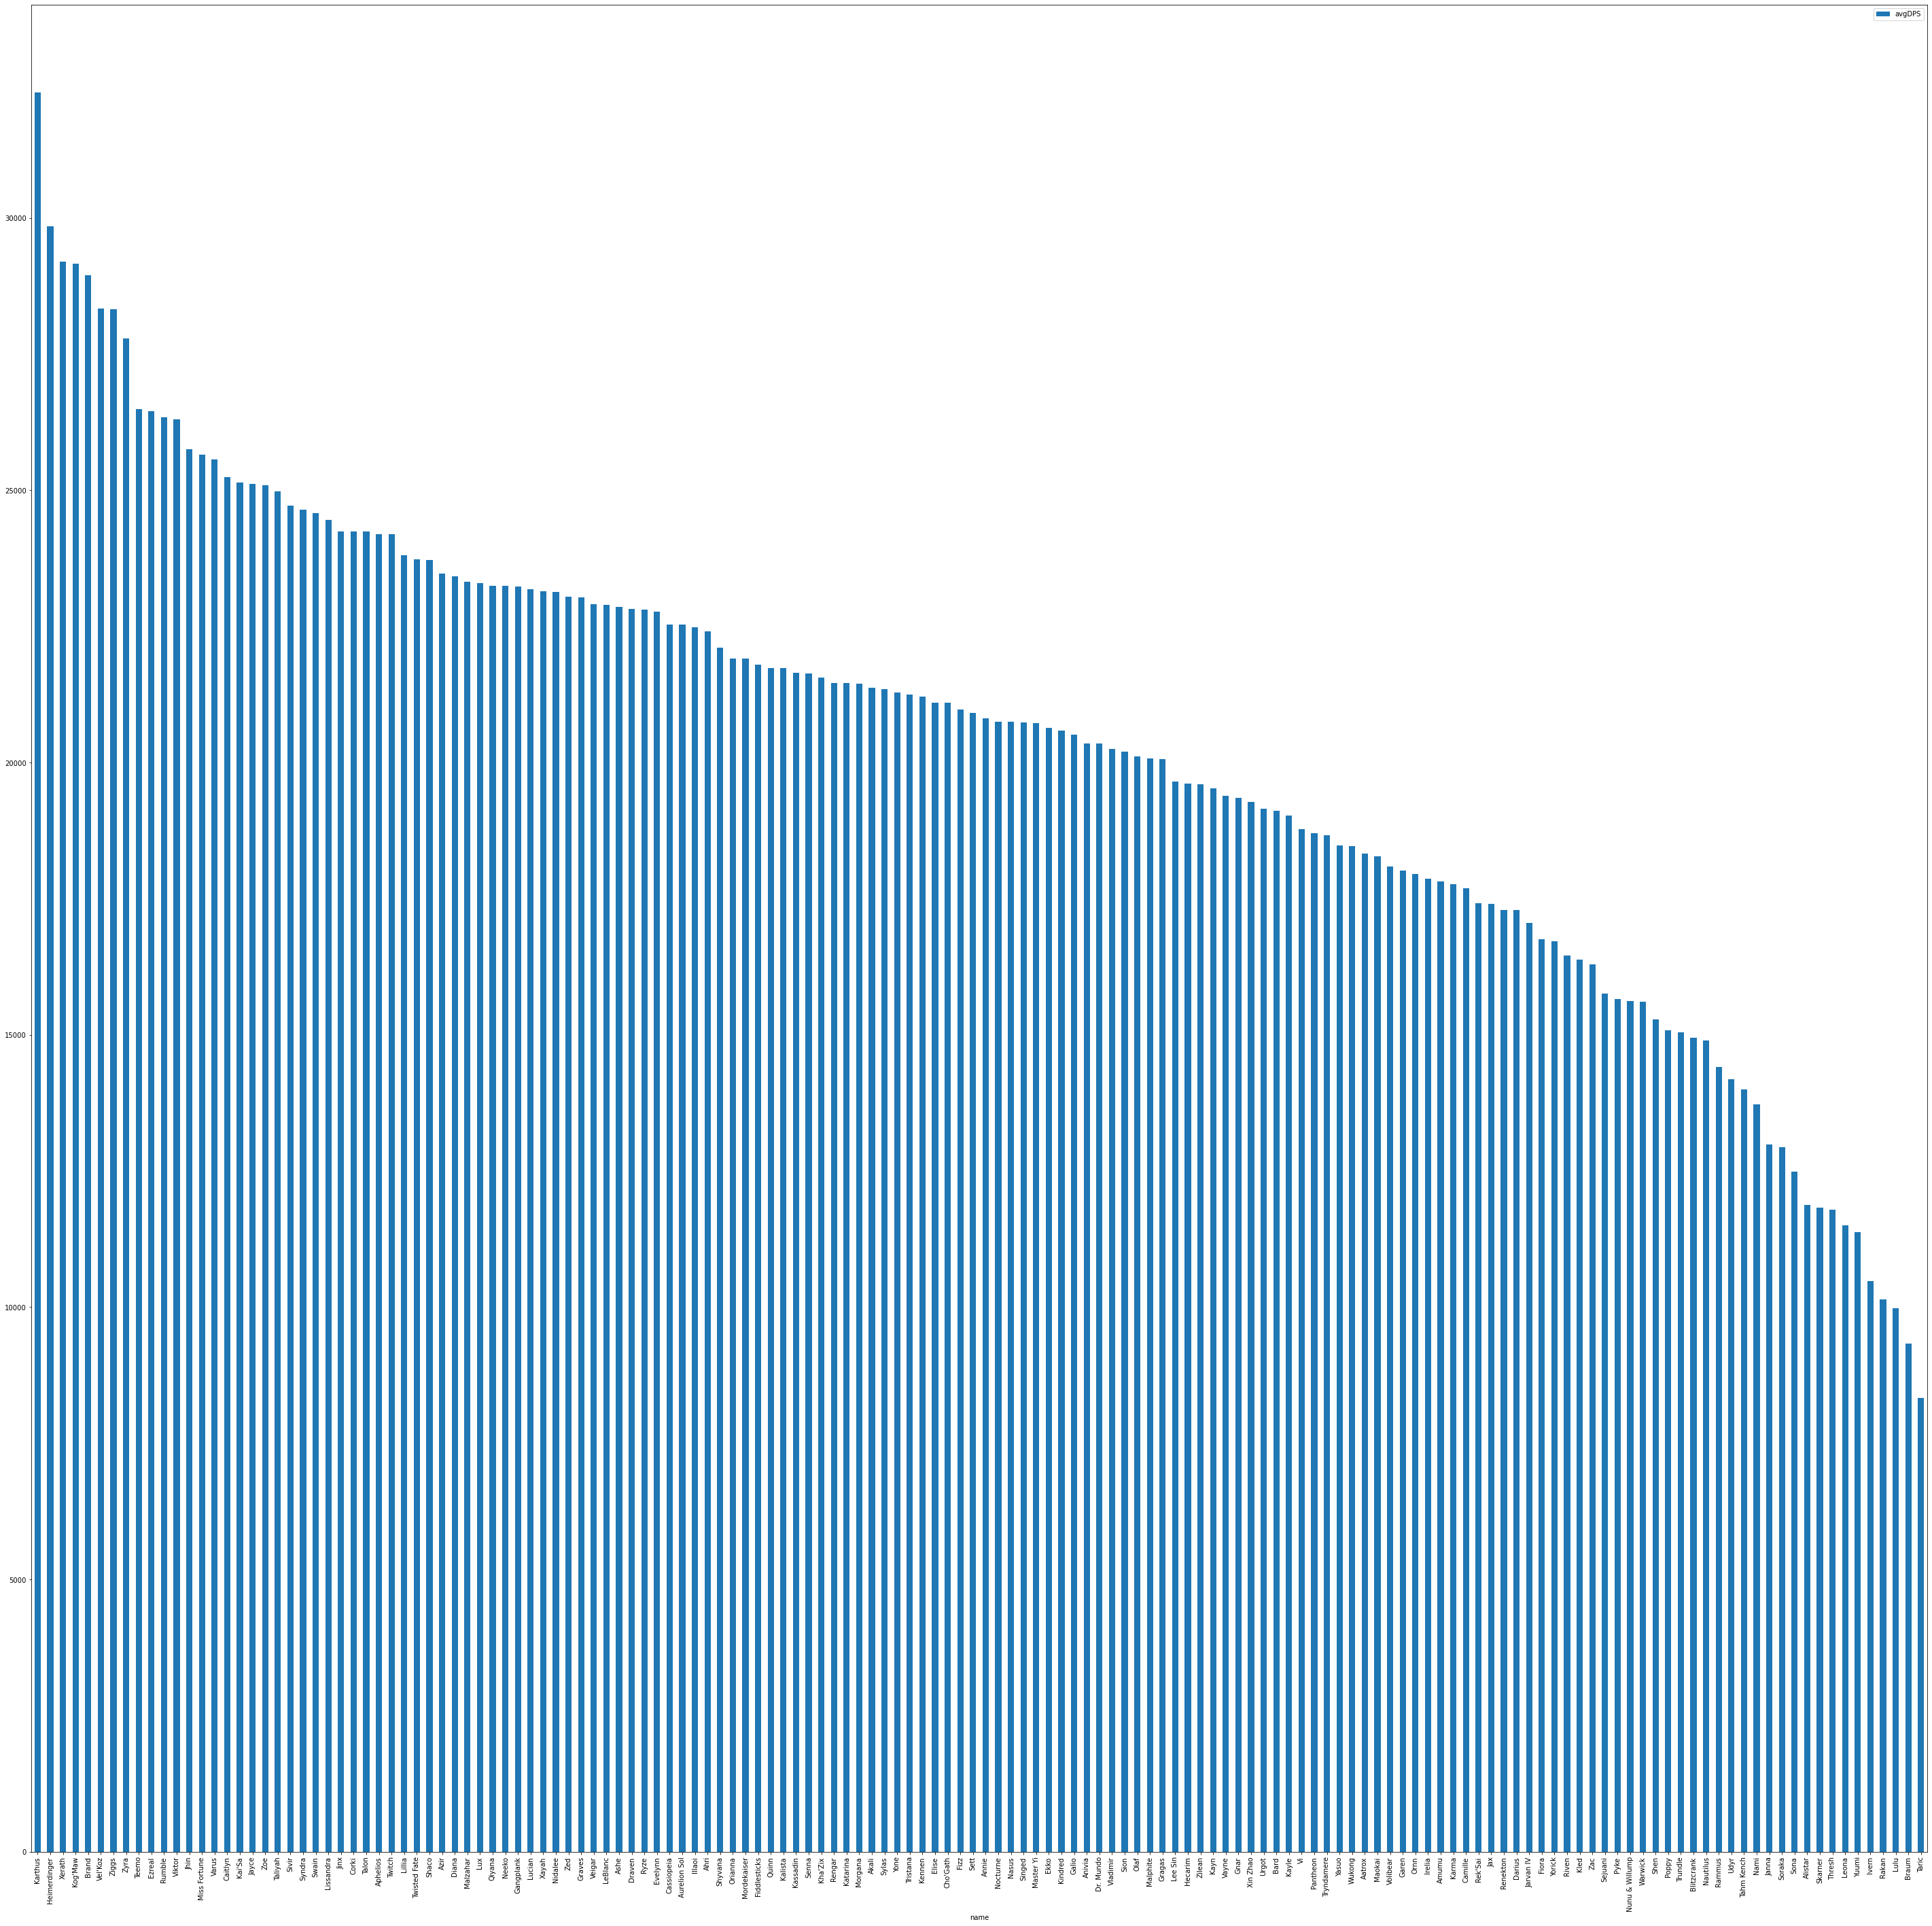

In [24]:
import matplotlib
ax = avgDPS_df[['name', 'avgDPS']].plot.bar(x='name', y='avgDPS', figsize=(50,50))

In [25]:
# noDPSChampName = avgDPS_df.tail(60)['name'].to_list()
# noDPSChampId = avgDPS_df.tail(60)['championId'].to_list()
noDPSq1 = avgDPS_df.loc[avgDPS_df['avgDPS'] <=  avgDPS_df['avgDPS'].quantile(0.25), ['name', 'championId']]
noDPSq2 = avgDPS_df.loc[avgDPS_df['avgDPS'] <=  avgDPS_df['avgDPS'].quantile(0.5), ['name', 'championId']]
noDPSChampIdq1 = noDPSq1['championId'].to_list()
noDPSChampIdq2 = noDPSq2['championId'].to_list()
# print(f'noDPSChampId = {noDPSChampId}')
print(f'noDPSChampNameQ1 = {noDPSq1["name"].to_list()}')
print(f'noDPSChampNameQ2 = {noDPSq2["name"].to_list()}')
print(f'noDPSChampIsQ2 = {noDPSChampIdq2}')

noDPSChampNameQ1 = ['Karma', 'Camille', "Rek'Sai", 'Jax', 'Renekton', 'Darius', 'Jarvan IV', 'Fiora', 'Yorick', 'Riven', 'Kled', 'Zac', 'Sejuani', 'Pyke', 'Nunu & Willump', 'Warwick', 'Shen', 'Poppy', 'Trundle', 'Blitzcrank', 'Nautilus', 'Rammus', 'Udyr', 'Tahm Kench', 'Nami', 'Janna', 'Soraka', 'Sona', 'Alistar', 'Skarner', 'Thresh', 'Leona', 'Yuumi', 'Ivern', 'Rakan', 'Lulu', 'Braum', 'Taric']
noDPSChampNameQ2 = ['Annie', 'Nocturne', 'Nasus', 'Singed', 'Master Yi', 'Ekko', 'Kindred', 'Galio', 'Anivia', 'Dr. Mundo', 'Vladimir', 'Sion', 'Olaf', 'Malphite', 'Gragas', 'Lee Sin', 'Hecarim', 'Zilean', 'Kayn', 'Vayne', 'Gnar', 'Xin Zhao', 'Urgot', 'Bard', 'Kayle', 'Vi', 'Pantheon', 'Tryndamere', 'Yasuo', 'Wukong', 'Aatrox', 'Maokai', 'Volibear', 'Garen', 'Ornn', 'Irelia', 'Amumu', 'Karma', 'Camille', "Rek'Sai", 'Jax', 'Renekton', 'Darius', 'Jarvan IV', 'Fiora', 'Yorick', 'Riven', 'Kled', 'Zac', 'Sejuani', 'Pyke', 'Nunu & Willump', 'Warwick', 'Shen', 'Poppy', 'Trundle', 'Blitzcrank', 'Nautil

In [26]:
# async def fetch_as_dataframe(con: asyncpg.Connection, query: str, *args):
#     stmt = await con.prepare(query)
#     columns = [a.name for a in stmt.get_attributes()]
#     data = await stmt.fetch()
#     return pd.DataFrame(data, columns=columns)

async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        # drMundoQuery = f'SELECT "gameId" FROM "Participant_Stats"\
        #                 WHERE "championId" = {champions.loc[champions["name"] == "Dr. Mundo", "championId"].values[0]} \
        #                 ORDER BY "gameId" ASC;'

        drMundoQuery = f'SELECT "gameId", "championId", "teamColor", "win" \
                    FROM "Participant_Stats" \
                    WHERE "gameId" = ANY( \
                        (SELECT array (SELECT "gameId" FROM "Participant_Stats"\
                                        WHERE "championId" = {champions.loc[champions["name"] == "Dr. Mundo", "championId"].values[0]} \
                                        ) \
                                        )::BIGINT[] \
                                        ) \
                    ORDER BY "gameId" ASC;'
        drMundoGames_df = await fetch_as_dataframe(connection, drMundoQuery)


        # gamesCount = await connection.fetch(f'SELECT COUNT(DISTINCT "gameId") FROM "Participant_Stats" ')
    # return (adcGames, gamesCount[0][0])
    return drMundoGames_df
# champions.loc[champions["name"] == "Amumu", "key"].values[0]
drMundoGames_df = loop.run_until_complete(run())
drMundoGames_df.head(20)

,gameId,championId,teamColor,win
0,2856722469,4,Red,True
1,2856722469,432,Blue,False
2,2856722469,36,Red,True
3,2856722469,83,Red,True
4,2856722469,202,Red,True
5,2856722469,497,Blue,False
6,2856722469,6,Blue,False
7,2856722469,51,Blue,False
8,2856722469,254,Blue,False
9,2856722469,21,Red,True


In [27]:
drMundoChampId = champions.loc[champions["name"] == "Dr. Mundo", "championId"].values[0]
def mundoTeam(df):
    drMundoTeamColor = drMundoGames_df.loc[(drMundoGames_df['gameId'] == df['gameId']) & (drMundoGames_df['championId'] == drMundoChampId), 'teamColor'].values[0]
    return True if df['teamColor'] == drMundoTeamColor else False
drMundoGames_df['isMundoTeam'] = drMundoGames_df.apply(lambda x: mundoTeam(x), axis=1)

drMundoGames_df

,gameId,championId,teamColor,win,isMundoTeam
0,2856722469,4,Red,True,True
1,2856722469,432,Blue,False,False
2,2856722469,36,Red,True,True
3,2856722469,83,Red,True,True
4,2856722469,202,Red,True,True
...,...,...,...,...,...
150295,3568284124,43,Red,False,False
150296,3568284124,17,Blue,True,True
150297,3568284124,36,Blue,True,True
150298,3568284124,203,Red,False,False


In [28]:
drMundoGames_df['isLowDPSQ1'] = drMundoGames_df.apply(lambda x: True if x['championId'] in noDPSChampIdq1 else False, axis=1)
drMundoGames_df['isLowDPSQ2'] = drMundoGames_df.apply(lambda x: True if x['championId'] in noDPSChampIdq2 else False, axis=1)

noDPSq1Games = drMundoGames_df.loc[(drMundoGames_df['isMundoTeam'] == False) & (drMundoGames_df['isLowDPSQ1'] == True)]
noDPSq2Games = drMundoGames_df.loc[(drMundoGames_df['isMundoTeam'] == False) & (drMundoGames_df['isLowDPSQ2'] == True)]
noDPSq2Games

,gameId,championId,teamColor,win,isMundoTeam,isLowDPSQ1,isLowDPSQ2
1,2856722469,432,Blue,False,False,False,True
5,2856722469,497,Blue,False,False,True,True
6,2856722469,6,Blue,False,False,False,True
8,2856722469,254,Blue,False,False,False,True
10,2857171698,34,Blue,True,False,False,True
...,...,...,...,...,...,...,...
150284,3568264886,245,Blue,False,False,False,True
150289,3568264886,64,Blue,False,False,False,True
150294,3568284124,111,Red,False,False,True,True
150295,3568284124,43,Red,False,False,True,True


In [29]:
noDPSq1Games = noDPSq1Games[['gameId', 'win', 'isLowDPSQ1']].groupby(['gameId']).agg(['sum'])[['win', 'isLowDPSQ1']]
noDPSq2Games = noDPSq2Games[['gameId', 'win', 'isLowDPSQ2']].groupby(['gameId']).agg(['sum'])[['win', 'isLowDPSQ2']]
noDPSq1Games.columns = noDPSq1Games.columns.map('_'.join)
noDPSq2Games.columns = noDPSq2Games.columns.map('_'.join)
noDPSq1Games = noDPSq1Games.reset_index()
noDPSq2Games = noDPSq2Games.reset_index()

# noDPSq1Games[noDPSq1Games['isLowDPSQ1_sum'] == 5]

In [30]:
oneLowDPS = noDPSq2Games[noDPSq2Games['isLowDPSQ2_sum'] == 1]
twoLowDPS = noDPSq2Games[noDPSq2Games['isLowDPSQ2_sum'] == 2]
threeLowDPS = noDPSq2Games[noDPSq2Games['isLowDPSQ2_sum'] == 3]
fourLowDPS = noDPSq2Games[noDPSq2Games['isLowDPSQ2_sum'] == 4]
fiveLowDPS = noDPSq2Games[noDPSq2Games['isLowDPSQ2_sum'] == 5]

oneLowDPSWR = oneLowDPS['win_sum'].astype(bool).sum(axis=0)/len(oneLowDPS.index)
twoLowDPSWR = twoLowDPS['win_sum'].astype(bool).sum(axis=0)/len(twoLowDPS.index)
threeLowDPSWR = threeLowDPS['win_sum'].astype(bool).sum(axis=0)/len(threeLowDPS.index)
fourLowDPSWR = fourLowDPS['win_sum'].astype(bool).sum(axis=0)/len(fourLowDPS.index)
fiveLowDPSWR = fiveLowDPS['win_sum'].astype(bool).sum(axis=0)/len(fiveLowDPS.index)

print(f"oneLowDPSWR: {oneLowDPSWR:.5f} [{oneLowDPS['win_sum'].astype(bool).sum(axis=0)} / {len(oneLowDPS.index)}]")
print(f"twoLowDPSWR: {twoLowDPSWR:.5f} [{twoLowDPS['win_sum'].astype(bool).sum(axis=0)} / {len(twoLowDPS.index)}]")
print(f"threeLowDPSWR: {threeLowDPSWR:.5f} [{threeLowDPS['win_sum'].astype(bool).sum(axis=0)} / {len(threeLowDPS.index)}]")
print(f"fourLowDPSWR: {fourLowDPSWR:.5f} [{fourLowDPS['win_sum'].astype(bool).sum(axis=0)} / {len(fourLowDPS.index)}]")
print(f"fiveLowDPSWR: {fiveLowDPSWR:.5f} [{fiveLowDPS['win_sum'].astype(bool).sum(axis=0)} / {len(fiveLowDPS.index)}]")

oneLowDPSWR: 0.47181 [1523 / 3228]
twoLowDPSWR: 0.48593 [2660 / 5474]
threeLowDPSWR: 0.47286 [1899 / 4016]
fourLowDPSWR: 0.42968 [611 / 1422]
fiveLowDPSWR: 0.30460 [53 / 174]


In [31]:
async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        lowDPSQuery = f'SELECT "gameId", "summonerName", "championId", "teamColor", "win" \
                    FROM "Participant_Stats" \
                    WHERE "championId" IN ({" ,".join(str(id) for id in noDPSChampIdq2)}) \
                    ORDER BY "gameId" ASC;'
        lowDPSGames_df = await fetch_as_dataframe(connection, lowDPSQuery)

    return lowDPSGames_df
# champions.loc[champions["name"] == "Amumu", "key"].values[0]
lowDPSGames_df = loop.run_until_complete(run())
lowDPSGames_df.head(20)

,gameId,summonerName,championId,teamColor,win
0,2855142709,Facehax,20,Blue,False
1,2855142709,MrBinky77,117,Red,True
2,2855142709,wildhunts,267,Red,True
3,2855142709,Cheesely,57,Red,True
4,2855142709,majinmajor,122,Blue,False
5,2855142709,MrCaretaker,75,Blue,False
6,2856401827,Lost Lamb,6,Red,False
7,2856401827,MethTookMyTeeth,10,Red,False
8,2856401827,HateTh30ry,106,Red,False
9,2856401827,bestballerver,37,Blue,True


In [32]:
lowDPSGames = lowDPSGames_df[['gameId', 'teamColor', 'win']].groupby(['gameId', 'teamColor']).agg(['sum', 'count'])['win']
lowDPSGames[lowDPSGames['count'] == 5]

,,sum,count
gameId,teamColor,,
2856486557,Blue,0,5
2857675118,Red,0,5
2858387696,Blue,0,5
2859868378,Red,5,5
2862240090,Blue,5,5
...,...,...,...
3567753700,Blue,0,5
3567927334,Red,5,5
3568082523,Blue,0,5


In [33]:
oneLowDPS = lowDPSGames[lowDPSGames['count'] == 1]
twoLowDPS = lowDPSGames[lowDPSGames['count'] == 2]
threeLowDPS = lowDPSGames[lowDPSGames['count'] == 3]
fourLowDPS = lowDPSGames[lowDPSGames['count'] == 4]
fiveLowDPS = lowDPSGames[lowDPSGames['count'] == 5]

oneLowDPSWR = (~oneLowDPS['sum'].astype(bool)).sum(axis=0)/len(oneLowDPS.index)
twoLowDPSWR = (~twoLowDPS['sum'].astype(bool)).sum(axis=0)/len(twoLowDPS.index)
threeLowDPSWR = (~threeLowDPS['sum'].astype(bool)).sum(axis=0)/len(threeLowDPS.index)
fourLowDPSWR = (~fourLowDPS['sum'].astype(bool)).sum(axis=0)/len(fourLowDPS.index)
fiveLowDPSWR = (~fiveLowDPS['sum'].astype(bool)).sum(axis=0)/len(fiveLowDPS.index)

print(f"oneLowDPSWR: {oneLowDPSWR:.5f} [{(~oneLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(oneLowDPS.index)}]")
print(f"twoLowDPSWR: {twoLowDPSWR:.5f} [{(~twoLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(twoLowDPS.index)}]")
print(f"threeLowDPSWR: {threeLowDPSWR:.5f} [{(~threeLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(threeLowDPS.index)}]")
print(f"fourLowDPSWR: {fourLowDPSWR:.5f} [{(~fourLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(fourLowDPS.index)}]")
print(f"fiveLowDPSWR: {fiveLowDPSWR:.5f} [{(~fiveLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(fiveLowDPS.index)}]")

oneLowDPSWR: 0.47818 [52167 / 109094]
twoLowDPSWR: 0.48802 [87071 / 178418]
threeLowDPSWR: 0.51128 [67647 / 132309]
fourLowDPSWR: 0.55776 [25046 / 44905]
fiveLowDPSWR: 0.60968 [3591 / 5890]


In [34]:
oneLowDPSWR = (oneLowDPS['sum'].astype(bool)).sum(axis=0)/len(oneLowDPS.index)
twoLowDPSWR = (twoLowDPS['sum'].astype(bool)).sum(axis=0)/len(twoLowDPS.index)
threeLowDPSWR = (threeLowDPS['sum'].astype(bool)).sum(axis=0)/len(threeLowDPS.index)
fourLowDPSWR = (fourLowDPS['sum'].astype(bool)).sum(axis=0)/len(fourLowDPS.index)
fiveLowDPSWR = (fiveLowDPS['sum'].astype(bool)).sum(axis=0)/len(fiveLowDPS.index)

print(f"oneLowDPSWR: {oneLowDPSWR:.5f} [{(oneLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(oneLowDPS.index)}]")
print(f"twoLowDPSWR: {twoLowDPSWR:.5f} [{(twoLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(twoLowDPS.index)}]")
print(f"threeLowDPSWR: {threeLowDPSWR:.5f} [{(threeLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(threeLowDPS.index)}]")
print(f"fourLowDPSWR: {fourLowDPSWR:.5f} [{(fourLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(fourLowDPS.index)}]")
print(f"fiveLowDPSWR: {fiveLowDPSWR:.5f} [{(fiveLowDPS['sum'].astype(bool)).sum(axis=0)} / {len(fiveLowDPS.index)}]")

oneLowDPSWR: 0.52182 [56927 / 109094]
twoLowDPSWR: 0.51198 [91347 / 178418]
threeLowDPSWR: 0.48872 [64662 / 132309]
fourLowDPSWR: 0.44224 [19859 / 44905]
fiveLowDPSWR: 0.39032 [2299 / 5890]


In [35]:
squishyChamps = champions[['championId', 'name', 'attack', 'defense', 'magic', 'hp', 'hpperlevel', 'armor', 'armorperlevel', 'spellblock', 'spellblockperlevel', 'hpregen', 'hpregenperlevel']]

In [36]:
squishyChamps['spellblock_18'] = squishyChamps['spellblock'] + squishyChamps['spellblockperlevel'] * 17
squishyChamps['armor_18'] = squishyChamps['armor'] + squishyChamps['spellblockperlevel'] * 17
squishyChamps['hp_18'] = squishyChamps['hp'] + squishyChamps['hpperlevel'] * 17
# squishyChamps['Mr_Def'] = squishyChamps['spellblock_18'] * squishyChamps['defense']
squishyChamps['MReffectiveHP'] = squishyChamps['hp_18'] * (squishyChamps['spellblock_18'] + 100)/100 #* squishyChamps['defense']
squishyChamps['ArmorEffectiveHP'] = squishyChamps['hp_18'] * (squishyChamps['armor_18'] + 100)/100 #* squishyChamps['defense']

squishyChamps[['name', 'defense', 'hp', 'hpperlevel', 'hp_18', 'spellblock', 'spellblockperlevel', 'spellblock_18', 'MReffectiveHP', 'ArmorEffectiveHP']].sort_values(axis=0, ascending=True, by='MReffectiveHP').head(60)

,name,defense,hp,hpperlevel,hp_18,spellblock,spellblockperlevel,spellblock_18,MReffectiveHP,ArmorEffectiveHP
143,Yuumi,1,480,70,1670,25.0,0.30,30.10,2172.67,2172.67
34,Gnar,5,510,65,1615,30.0,0.50,38.50,2236.78,2269.07
42,Janna,5,500,70,1690,30.0,0.50,38.50,2340.65,2306.85
59,Kled,2,340,70,1530,32.1,1.25,53.35,2346.26,2390.62
77,Nami,3,475,74,1733,30.0,0.50,38.50,2400.2,2382.88
67,Lulu,5,525,74,1783,30.0,0.50,38.50,2469.45,2451.62
110,Sona,2,482.36,77,1791.36,30.0,0.50,38.50,2481.03,2445.21
111,Soraka,5,535,74,1793,30.0,0.50,38.50,2483.3,2519.16
101,Senna,2,520,75,1795,30.0,0.50,38.50,2486.07,2450.18
149,Zyra,3,504,79,1847,30.0,0.50,38.50,2558.09,2539.62


In [37]:
squishyChamps['MReffectiveHP'].quantile([.25, .5, .75])

0.25    2867.64
0.50    3007.93
0.75    3235.68
Name: MReffectiveHP, dtype: object

In [38]:
squishyChampsList = squishyChamps.loc[squishyChamps['MReffectiveHP'] <= squishyChamps['MReffectiveHP'].quantile(.5)].sort_values(axis=0, ascending=True, by='MReffectiveHP')['name'].to_list()
print(squishyChampsList)

['Yuumi', 'Gnar', 'Janna', 'Kled', 'Nami', 'Lulu', 'Sona', 'Soraka', 'Senna', 'Zyra', 'Anivia', 'Zilean', 'Lux', 'Heimerdinger', 'Aphelios', 'Kennen', 'Swain', 'Sion', 'Quinn', 'Kindred', 'Nidalee', 'Corki', 'Brand', 'Malzahar', "Vel'Koz", 'Orianna', 'Annie', 'Ezreal', 'Vayne', 'Karthus', 'Lucian', 'Ashe', 'Syndra', 'Tristana', 'Teemo', 'Viktor', 'Taliyah', 'Neeko', 'Jinx', 'Bard', 'Twitch', 'Varus', 'Lissandra', 'Xayah', 'Xerath', 'Morgana', 'Ahri', 'Jayce', 'Caitlyn', 'Sivir', 'LeBlanc', "Kog'Maw", "Kai'Sa", 'Ziggs', 'Kayle', 'Kassadin', 'Elise', 'Azir', 'Cassiopeia', 'Nocturne', 'Zoe', 'Twisted Fate', 'Veigar', 'Draven', 'Aurelion Sol', 'Wukong', 'Gangplank', 'Thresh', "Cho'Gath", 'Garen', 'Fiddlesticks', 'Karma', 'Miss Fortune', 'Jhin', 'Vladimir']


In [39]:
import itertools
champNameCombo = list(itertools.combinations(champions['name'], 2))
print(champNameCombo[0])

champIdCombinations = list(itertools.combinations(champions['championId'], 2))
# champIdCombinations

('Aatrox', 'Ahri')


In [89]:
async def run():
    connection = await asyncpg.connect(user=dbConfig['user'],
                                password=dbConfig['password'],
                                host=dbConfig['host'],
                                port=dbConfig['port'],
                                database=dbConfig['database'])
    async with connection.transaction():
        allGamesQuery = f'SELECT "gameId", "championId", "teamColor", "win" \
                    FROM "Participant_Stats" \
                    ORDER BY "gameId" ASC;'
        allGames_df = await fetch_as_dataframe(connection, allGamesQuery)

    return allGames_df

allGames_df = loop.run_until_complete(run())
allGames_df

gameId         int64
championId     int64
teamColor     object
win             bool
dtype: object

In [86]:
dictList = []
allGames_df['isSynergy'] = allGames_df['championId'].isin((champIdCombinations[0][0], champIdCombinations[0][1]))
synergyGames_df = allGames_df.loc[allGames_df['isSynergy'] == True, ['gameId', 'teamColor', 'win']]
synergyGames_df = synergyGames_df.groupby(['gameId', 'teamColor']).agg(['sum', 'count'])
synergyGames_df = synergyGames_df.loc[synergyGames_df['win']['count'] == 2, 'win']
# dictList.append({'champion1': champions.loc[champions["championId"] == champ1, "name"].values[0], \
#                                         'champion2': champions.loc[champions["championId"] == champ2, "name"].values[0], \
#                                         'winRate': synergyGames_df['sum'].astype(bool).sum(axis=0)/len(synergyGames_df.index), \
#                                         'numWins': synergyGames_df['sum'].astype(bool).sum(axis=0), \
#                                         'numGames': len(synergyGames_df.index) \
#                                         })

,,sum,count
gameId,teamColor,,
2861009195,Red,0,2
2888986608,Red,0,2
2892929938,Blue,2,2
2895152719,Blue,0,2
2895226229,Red,0,2
...,...,...,...
3565629313,Blue,2,2
3565874621,Blue,2,2
3565971543,Blue,0,2


In [88]:
# twoSynergy_df = pd.DataFrame(columns = ['champion1', 'champion2', 'winRate', 'numWins', 'numGames'])
dictList = []
for champ1, champ2 in champIdCombinations:
    allGames_df['isSynergy'] = allGames_df['championId'].isin((champIdCombinations[0][0], champIdCombinations[0][1]))
    synergyGames_df = allGames_df.loc[allGames_df['isSynergy'] == True, ['gameId', 'teamColor', 'win']]
    synergyGames_df = synergyGames_df.groupby(['gameId', 'teamColor']).agg(['sum', 'count'])
    synergyGames_df = synergyGames_df.loc[synergyGames_df['win']['count'] == 2, 'win']
    dictList.append({'champion1': champions.loc[champions["championId"] == champ1, "name"].values[0],
                                            'champion2': champions.loc[champions["championId"] == champ2, "name"].values[0], 
                                            'winRate': synergyGames_df['sum'].astype(bool).sum(axis=0)/len(synergyGames_df.index),
                                            'numWins': synergyGames_df['sum'].astype(bool).sum(axis=0),
                                            'numGames': len(synergyGames_df.index)
                                            })
    # synergyGames_df
    # twoSynergy_df = twoSynergy_df.append({'champion1': champions.loc[champions["championId"] == champ1, "name"].values[0],
    #                                         'champion2': champions.loc[champions["championId"] == champ2, "name"].values[0], 
    #                                         'winRate': synergyGames_df['sum'].astype(bool).sum(axis=0)/len(synergyGames_df.index),
    #                                         'numWins': synergyGames_df['sum'].astype(bool).sum(axis=0),
    #                                         'numGames': len(synergyGames_df.index)
    #                                         }, ignore_index=True )
twoSynergy_df = pd.DataFrame.from_dict(dictList)
twoSynergy_df.head()

,champion1,champion2,winRate,numWins,numGames
0,Aatrox,Ahri,0.488253,478,979
1,Aatrox,Akali,0.488253,478,979
2,Aatrox,Alistar,0.488253,478,979
3,Aatrox,Amumu,0.488253,478,979
4,Aatrox,Anivia,0.488253,478,979


In [42]:
twoSynergy_df.sort_values(axis=0, ascending=False, by='winRate', inplace=True)
twoSynergy_df

,champion1,champion2,winRate,numWins,numGames
3501,Elise,Sett,0.678261,78,115
10702,Taric,Yorick,0.658537,27,41
5058,Heimerdinger,Xerath,0.658537,297,451
7681,Lissandra,Yorick,0.657534,48,73
5066,Heimerdinger,Ziggs,0.653030,431,660
...,...,...,...,...,...
5356,Ivern,Skarner,0.205128,8,39
7571,Lillia,Taliyah,0.204545,9,44
9640,Rek'Sai,Sejuani,0.200000,4,20
9679,Rek'Sai,Xin Zhao,0.194444,7,36


In [43]:
# twoSynergy_df.to_csv('twoSynergy.csv', sep=',')